<a href="https://colab.research.google.com/github/Tong-Zhong/Python_data_analysis/blob/main/2017_2021%E5%8F%B0%E7%81%A3%E5%AF%A6%E5%83%B9%E7%99%BB%E9%8C%84%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

<font color="torange" size=6px><center><b>資料科學與公共事務</b></span></center></font>

<br>
<br>

<font color="orange" size=5px><center><b>專題報告</b></span></center></font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###姓名：鍾雨彤
###學號：S08521136
###日期：2022/12/02


#**1.背景**
**實價登錄**於2012年8月1日起施行，是指政府要求不動產交易的買賣雙方在交易完成後誠實回報交易資料的制度，以達到房價公開透明。(摘錄自:花蓮地政事務所--地價課網站)並於2021年推出「實價登錄2.0」進一步促使不動產市場發展更為健全。

本研究主要分析近五年台灣不動產趨勢，資料來自「內政部不動產交易實價查詢服務網」共**22個縣市**的**2017年至2021年**Q1~Q4資料，將其整併成一年，並從33個欄位中擷取**9個欄位**，另加入類別欄位"年份"及"縣市"進行資料分析。

#**2.欲回答的疑問**
**Q1.** 近五年台灣不動產**交易筆數**最多的是哪三個縣市？

**Q2.** 近五年**最高交易總價**落在哪一鄉鎮市區？用途為何？

**Q3.** 2021年台灣房地產**平均單價**(每平方公尺/元)前三高的縣市為哪些？

**Q4.** 近五年各縣市**建物移轉總面積**加總前三名的縣市，又各自以哪三個鄉鎮市區為大宗?

**Q5.** 近五年各縣市**主建物佔比**(主建物面積/建物移轉總面積)眾數是多少?

**Q6.** 近五年台灣六都**平均車位價值**(每平方公尺)排名？

**Q7.** 2021年《遠見》雜誌公布全台「生活品質與現代化」排名前三大縣市:<font color = "blue">**新竹縣、桃園市、彰化縣**</font>，近五年不動產交易的**住用比率**為幾成?

**Q8.** 觀察近五年**走勢**，Covid-19疫情影響年(2020年與2021年)各縣市不動產交易件數是否呈現量縮？






#**3.資料來源與內容**
**資料來源**：內政部不動產交易實價查詢服務網  https://plvr.land.moi.gov.tw/DownloadOpenData

**內容來源：**花蓮地政事務所--地價課網站  https://www.hl-land.gov.tw/News_Content.aspx?n=209&s=979

#**4.資料前處理**

#基礎前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-12-02 15:18:59--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.101.113, 142.250.101.138, 142.250.101.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pctmfpj65btjhepavd83tsefr7suobll/1669994325000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=13254703-1604-447d-807e-479c7248b653 [following]
--2022-12-02 15:19:02--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pctmfpj65btjhepavd83tsefr7suobll/1669994325000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=13254703-1604-447d-807e-479c7248b653
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to d

In [ ]:
#匯入套件
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#資料匯入

2017年縣市資料匯入及整併

In [ ]:
#匯入2017年縣市資料(1)
Taipei_City_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_台北市.csv")
Taichung_City_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_台中市.csv")
Keelung_City_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_基隆市.csv")
Tainan_City_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_台南市.csv")
Kaohsiung_City_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_高雄市.csv")
New_Taipei_City_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_新北市.csv")
Yilan_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_宜蘭縣.csv")
Taoyuan_City_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_桃園市.csv")
Chiayi_City_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_嘉義市.csv")
Hsinchu_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_新竹縣.csv")
Miaoli_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_苗栗縣.csv")

In [ ]:
#匯入2017年縣市資料(2)
Nantou_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_南投縣.csv")
Changhua_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_彰化縣.csv")
Hsinchu_City_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_新竹市.csv")
Yunlin_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_雲林縣.csv")
Chiayi_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_嘉義縣.csv")
Pingtung_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_屏東縣.csv")
Hualien_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_花蓮縣.csv")
Taitung_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_台東縣.csv")
Kinmen_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_金門縣.csv")
Penghu_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_澎湖縣.csv")
Lienchiang_County_2017 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2017_total/2017_連江縣.csv")

In [ ]:
#將2017年22個縣市的資料整併
frames_2017 = [ Taipei_City_2017, Taichung_City_2017, Keelung_City_2017, Tainan_City_2017, Kaohsiung_City_2017, New_Taipei_City_2017,
        Yilan_County_2017, Taoyuan_City_2017, Chiayi_City_2017, Hsinchu_County_2017, Miaoli_County_2017, Nantou_County_2017,
        Changhua_County_2017, Hsinchu_City_2017, Yunlin_County_2017, Chiayi_County_2017, Pingtung_County_2017, Hualien_County_2017,
        Taitung_County_2017, Kinmen_County_2017, Penghu_County_2017, Lienchiang_County_2017 ]
df_2017 = pd.concat(frames_2017)

2018年縣市資料匯入及整併

In [ ]:
#匯入2018年縣市資料(1)
Taipei_City_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_台北市.csv")
Taichung_City_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_台中市.csv")
Keelung_City_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_基隆市.csv")
Tainan_City_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_台南市.csv")
Kaohsiung_City_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_高雄市.csv")
New_Taipei_City_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_新北市.csv")
Yilan_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_宜蘭縣.csv")
Taoyuan_City_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_桃園市.csv")
Chiayi_City_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_嘉義市.csv")
Hsinchu_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_新竹縣.csv")
Miaoli_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_苗栗縣.csv")

In [ ]:
#匯入2018年縣市資料(2)
Nantou_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_南投縣.csv")
Changhua_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_彰化縣.csv")
Hsinchu_City_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_新竹市.csv")
Yunlin_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_雲林縣.csv")
Chiayi_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_嘉義縣.csv")
Pingtung_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_屏東縣.csv")
Hualien_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_花蓮縣.csv")
Taitung_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_台東縣.csv")
Kinmen_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_金門縣.csv")
Penghu_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_澎湖縣.csv")
Lienchiang_County_2018 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2018_total/2018_連江縣.csv")

In [ ]:
#將2018年22個縣市的資料整併
frames_2018 = [ Taipei_City_2018, Taichung_City_2018, Keelung_City_2018, Tainan_City_2018, Kaohsiung_City_2018, New_Taipei_City_2018,
        Yilan_County_2018, Taoyuan_City_2018, Chiayi_City_2018, Hsinchu_County_2018, Miaoli_County_2018, Nantou_County_2018,
        Changhua_County_2018, Hsinchu_City_2018, Yunlin_County_2018, Chiayi_County_2018, Pingtung_County_2018, Hualien_County_2018,
        Taitung_County_2018, Kinmen_County_2018, Penghu_County_2018, Lienchiang_County_2018 ]
df_2018 = pd.concat(frames_2018)

2019年縣市資料匯入及整併

In [ ]:
#匯入2019年縣市資料(1)
Taipei_City_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_台北市.csv")
Taichung_City_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_台中市.csv")
Keelung_City_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_基隆市.csv")
Tainan_City_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_台南市.csv")
Kaohsiung_City_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_高雄市.csv")
New_Taipei_City_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_新北市.csv")
Yilan_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_宜蘭縣.csv")
Taoyuan_City_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_桃園市.csv")
Chiayi_City_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_嘉義市.csv")
Hsinchu_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_新竹縣.csv")
Miaoli_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_苗栗縣.csv")

In [ ]:
#匯入2019年縣市資料(2)
Nantou_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_南投縣.csv")
Changhua_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_彰化縣.csv")
Hsinchu_City_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_新竹市.csv")
Yunlin_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_雲林縣.csv")
Chiayi_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_嘉義縣.csv")
Pingtung_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_屏東縣.csv")
Hualien_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_花蓮縣.csv")
Taitung_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_台東縣.csv")
Kinmen_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_金門縣.csv")
Penghu_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_澎湖縣.csv")
Lienchiang_County_2019 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2019_total/2019_連江縣.csv")

In [ ]:
#將2019年22個縣市的資料整併
frames_2019 = [ Taipei_City_2019, Taichung_City_2019, Keelung_City_2019, Tainan_City_2019, Kaohsiung_City_2019, New_Taipei_City_2019,
        Yilan_County_2019, Taoyuan_City_2019, Chiayi_City_2019, Hsinchu_County_2019, Miaoli_County_2019, Nantou_County_2019,
        Changhua_County_2019, Hsinchu_City_2019, Yunlin_County_2019, Chiayi_County_2019, Pingtung_County_2019, Hualien_County_2019,
        Taitung_County_2019, Kinmen_County_2019, Penghu_County_2019, Lienchiang_County_2019 ]
df_2019 = pd.concat(frames_2019)

2020年縣市資料匯入及整併

In [ ]:
#匯入2020年縣市資料(1)
Taipei_City_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_台北市.csv")
Taichung_City_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_台中市.csv")
Keelung_City_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_基隆市.csv")
Tainan_City_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_台南市.csv")
Kaohsiung_City_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_高雄市.csv")
New_Taipei_City_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_新北市.csv")
Yilan_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_宜蘭縣.csv")
Taoyuan_City_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_桃園市.csv")
Chiayi_City_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_嘉義市.csv")
Hsinchu_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_新竹縣.csv")
Miaoli_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_苗栗縣.csv")

In [ ]:
#匯入2020年縣市資料(2)
Nantou_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_南投縣.csv")
Changhua_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_彰化縣.csv")
Hsinchu_City_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_新竹市.csv")
Yunlin_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_雲林縣.csv")
Chiayi_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_嘉義縣.csv")
Pingtung_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_屏東縣.csv")
Hualien_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_花蓮縣.csv")
Taitung_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_台東縣.csv")
Kinmen_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_金門縣.csv")
Penghu_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_澎湖縣.csv")
Lienchiang_County_2020 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2020_total/2020_連江縣.csv")

In [ ]:
#將2020年22個縣市的資料整併
frames_2020 = [ Taipei_City_2020, Taichung_City_2020, Keelung_City_2020, Tainan_City_2020, Kaohsiung_City_2020, New_Taipei_City_2020,
        Yilan_County_2020, Taoyuan_City_2020, Chiayi_City_2020, Hsinchu_County_2020, Miaoli_County_2020, Nantou_County_2020,
        Changhua_County_2020, Hsinchu_City_2020, Yunlin_County_2020, Chiayi_County_2020, Pingtung_County_2020, Hualien_County_2020,
        Taitung_County_2020, Kinmen_County_2020, Penghu_County_2020, Lienchiang_County_2020 ]
df_2020 = pd.concat(frames_2020)

2021年縣市資料匯入及整併

In [ ]:
#匯入2021年縣市資料(1)
Taipei_City_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_台北市.csv")
Taichung_City_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_台中市.csv")
Keelung_City_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_基隆市.csv")
Tainan_City_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_台南市.csv")
Kaohsiung_City_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_高雄市.csv")
New_Taipei_City_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_新北市.csv")
Yilan_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_宜蘭縣.csv")
Taoyuan_City_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_桃園市.csv")
Chiayi_City_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_嘉義市.csv")
Hsinchu_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_新竹縣.csv")
Miaoli_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_苗栗縣.csv")

In [ ]:
#匯入2021年縣市資料(2)
Nantou_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_南投縣.csv")
Changhua_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_彰化縣.csv")
Hsinchu_City_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_新竹市.csv")
Yunlin_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_雲林縣.csv")
Chiayi_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_嘉義縣.csv")
Pingtung_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_屏東縣.csv")
Hualien_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_花蓮縣.csv")
Taitung_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_台東縣.csv")
Kinmen_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_金門縣.csv")
Penghu_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_澎湖縣.csv")
Lienchiang_County_2021 = pd.read_csv("/content/drive/MyDrive/data/total_2017~2021/2021_total/2021_連江縣.csv")

In [ ]:
#將2021年22個縣市的資料整併
frames_2021 = [ Taipei_City_2021, Taichung_City_2021, Keelung_City_2021, Tainan_City_2021, Kaohsiung_City_2021, New_Taipei_City_2021,
        Yilan_County_2021, Taoyuan_City_2021, Chiayi_City_2021, Hsinchu_County_2021, Miaoli_County_2021, Nantou_County_2021,
        Changhua_County_2021, Hsinchu_City_2021, Yunlin_County_2021, Chiayi_County_2021, Pingtung_County_2021, Hualien_County_2021,
        Taitung_County_2021, Kinmen_County_2021, Penghu_County_2021, Lienchiang_County_2021 ]
df_2021 = pd.concat(frames_2021)

#資料表處理

In [ ]:
#查看資料表
df_2017

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2017.0,台北市,中正區,車位,3100000.0,商,NaN,3100000.0,0.00,0.00,40.77
1,2017.0,台北市,中正區,房地(土地+建物),51983.0,住,1217.0,0.0,0.00,38.87,42.72
2,2017.0,台北市,中正區,房地(土地+建物),12250000.0,住,169035.0,0.0,0.00,59.00,72.47
3,2017.0,台北市,文山區,房地(土地+建物)+車位,47000000.0,住,106135.0,2800000.0,33.74,256.85,450.19
4,2017.0,台北市,文山區,土地,31650000.0,住,393168.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
38,2017.0,連江縣,南竿鄉,土地,711450.0,住,9295.0,0.0,0.00,0.00,0.00
39,2017.0,連江縣,莒光鄉,土地,800000.0,其他,2645.0,0.0,0.00,0.00,0.00
40,2017.0,連江縣,南竿鄉,土地,150000.0,商,10316.0,0.0,0.00,0.00,0.00
41,2017.0,連江縣,南竿鄉,土地,150000.0,商,10316.0,0.0,0.00,0.00,0.00


In [ ]:
#將"單價(每平方公尺)"改為更精確的單位"單價(每平方公尺/元)"
df_2017 = df_2017.rename(columns={'單價(每平方公尺)': '單價(每平方公尺/元)'})

In [ ]:
#查看前五筆資料
df_2017.head(5)

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺/元),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2017.0,台北市,中正區,車位,3100000.0,商,NaN,3100000.0,0.00,0.00,40.77
1,2017.0,台北市,中正區,房地(土地+建物),51983.0,住,1217.0,0.0,0.00,38.87,42.72
2,2017.0,台北市,中正區,房地(土地+建物),12250000.0,住,169035.0,0.0,0.00,59.00,72.47
3,2017.0,台北市,文山區,房地(土地+建物)+車位,47000000.0,住,106135.0,2800000.0,33.74,256.85,450.19
4,2017.0,台北市,文山區,土地,31650000.0,住,393168.0,0.0,0.00,0.00,0.00


In [ ]:
#查看資料表資訊
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307346 entries, 0 to 42
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   年份             307345 non-null  float64
 1   縣市             307345 non-null  object 
 2   鄉鎮市區           307342 non-null  object 
 3   交易標的           307345 non-null  object 
 4   總價(NTD)        307345 non-null  float64
 5   都市土地使用分區       242630 non-null  object 
 6   單價(每平方公尺/元)    300705 non-null  float64
 7   車位總價(NTD)      307345 non-null  float64
 8   車位移轉總面積(平方公尺)  307345 non-null  float64
 9   主建物面積(平方公尺)    307345 non-null  float64
 10  建物移轉總面積(平方公尺)  307345 non-null  float64
dtypes: float64(7), object(4)
memory usage: 28.1+ MB


In [ ]:
#將"年份"從float改為object
df_2017.replace(2017.0,"2017",inplace=True)

* 2017共有<font color = red>307345筆</font>交易 
* 鄉鎮市區：有3筆空值(無法填入)
* 都市土地使用分區：有空值為<font color = red>正常現象</font>(表示為非都市土地使用分區)
* 單價：有6640筆空值(此欄空值代表該筆交易標的為<font color = red>車位</font>)

In [ ]:
#查看資料表
df_2018

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2018,台北市,文山區,房地(土地+建物),10200000,商,151515.0,0,0.00,38.83,67.32
1,2018,台北市,文山區,房地(土地+建物)+車位,42400000,商,188917.0,2000000,42.94,112.81,256.79
2,2018,台北市,文山區,房地(土地+建物),20300000,住,163486.0,0,0.00,68.17,124.17
3,2018,台北市,中正區,房地(土地+建物),19000000,商,238934.0,0,0.00,44.93,79.52
4,2018,台北市,中正區,房地(土地+建物),15500000,商,220578.0,0,0.00,39.40,70.27
...,...,...,...,...,...,...,...,...,...,...,...
16,2018,連江縣,南竿鄉,土地,490936,住,10900.0,0,0.00,0.00,0.00
17,2018,連江縣,南竿鄉,土地,68950,商,10893.0,0,0.00,0.00,0.00
18,2018,連江縣,南竿鄉,土地,169861,其他,5043.0,0,0.00,0.00,0.00
19,2018,連江縣,南竿鄉,土地,182156,住,5901.0,0,0.00,0.00,0.00


In [ ]:
#將"單價(每平方公尺)"改為更精確的單位"單價(每平方公尺/元)"
df_2018 = df_2018.rename(columns={'單價(每平方公尺)': '單價(每平方公尺/元)'})

In [ ]:
#查看前五筆資料
df_2018.head(5)

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺/元),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2018,台北市,文山區,房地(土地+建物),10200000,商,151515.0,0,0.00,38.83,67.32
1,2018,台北市,文山區,房地(土地+建物)+車位,42400000,商,188917.0,2000000,42.94,112.81,256.79
2,2018,台北市,文山區,房地(土地+建物),20300000,住,163486.0,0,0.00,68.17,124.17
3,2018,台北市,中正區,房地(土地+建物),19000000,商,238934.0,0,0.00,44.93,79.52
4,2018,台北市,中正區,房地(土地+建物),15500000,商,220578.0,0,0.00,39.40,70.27


In [ ]:
#查看資料表資訊
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312368 entries, 0 to 20
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   年份             312368 non-null  int64  
 1   縣市             312368 non-null  object 
 2   鄉鎮市區           312368 non-null  object 
 3   交易標的           312368 non-null  object 
 4   總價(NTD)        312368 non-null  int64  
 5   都市土地使用分區       250850 non-null  object 
 6   單價(每平方公尺/元)    305778 non-null  float64
 7   車位總價(NTD)      312368 non-null  int64  
 8   車位移轉總面積(平方公尺)  312368 non-null  float64
 9   主建物面積(平方公尺)    312368 non-null  float64
 10  建物移轉總面積(平方公尺)  312368 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 28.6+ MB


In [ ]:
#將"年份"從int改為object
df_2018.replace(2018,"2018",inplace=True)

* 2018共有<font color = red>312368筆</font>交易 
* 都市土地使用分區：有空值為<font color = red>正常現象</font>(表示為非都市土地使用分區)
* 單價：有6590筆空值(此欄空值代表該筆交易標的為<font color = red>車位</font>)

In [ ]:
#確認資料表
df_2019

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2019,台北市,文山區,房地(土地+建物)+車位,17500000,住,288861.0,1500000.0,13.29,34.68,68.68
1,2019,台北市,文山區,房地(土地+建物),9800000,住,110822.0,0.0,0.0,84.84,88.43
2,2019,台北市,中正區,房地(土地+建物),7000000,住,82606.0,0.0,0.0,84.74,84.74
3,2019,台北市,中正區,土地,116004,住,5588.0,0.0,0.0,0.00,0.0
4,2019,台北市,中正區,房地(土地+建物)+車位,17030000,商,265223.0,0.0,2.21,34.90,64.21
...,...,...,...,...,...,...,...,...,...,...,...
50,2019,連江縣,北竿鄉,土地,76747,其他,480,0.0,0,0.00,0
51,2019,連江縣,南竿鄉,土地,342337,商,6684,0.0,0,0.00,0
52,2019,連江縣,南竿鄉,土地,431335,商,6710,0.0,0,0.00,0
53,2019,連江縣,莒光鄉,土地,50020,住,2000,0.0,0,0.00,0


In [ ]:
#將"單價(每平方公尺)"改為更精確的單位"單價(每平方公尺/元)"
df_2019 = df_2019.rename(columns={'單價(每平方公尺)': '單價(每平方公尺/元)'})

In [ ]:
#查看前五筆資料
df_2019.head(5)

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺/元),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2019,台北市,文山區,房地(土地+建物)+車位,17500000,住,288861.0,1500000.0,13.29,34.68,68.68
1,2019,台北市,文山區,房地(土地+建物),9800000,住,110822.0,0.0,0.0,84.84,88.43
2,2019,台北市,中正區,房地(土地+建物),7000000,住,82606.0,0.0,0.0,84.74,84.74
3,2019,台北市,中正區,土地,116004,住,5588.0,0.0,0.0,0.00,0.0
4,2019,台北市,中正區,房地(土地+建物)+車位,17030000,商,265223.0,0.0,2.21,34.90,64.21


In [ ]:
#查看資料表資訊
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328014 entries, 0 to 54
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   年份             328014 non-null  int64  
 1   縣市             328014 non-null  object 
 2   鄉鎮市區           316657 non-null  object 
 3   交易標的           316657 non-null  object 
 4   總價(NTD)        325274 non-null  object 
 5   都市土地使用分區       256217 non-null  object 
 6   單價(每平方公尺/元)    321431 non-null  object 
 7   車位總價(NTD)      325264 non-null  float64
 8   車位移轉總面積(平方公尺)  325274 non-null  object 
 9   主建物面積(平方公尺)    328014 non-null  float64
 10  建物移轉總面積(平方公尺)  325750 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 30.0+ MB


In [ ]:
#將"交易標的"為空值的資料去除
df_2019.dropna(axis=0, subset=["交易標的"], inplace=True)

In [ ]:
#將"年份"從int改為object;"總價(NTD)"轉為int;"單價(每平方公尺/元)"、"車位移轉總面積(平方公尺)"、"建物移轉總面積(平方公尺)"轉為float
df_2019.replace(2019,"2019",inplace=True)
df_2019["總價(NTD)"] = df_2019["總價(NTD)"].values.astype(int)
df_2019["單價(每平方公尺/元)"] = df_2019["單價(每平方公尺/元)"].values.astype(float)
df_2019["車位移轉總面積(平方公尺)"] = df_2019["車位移轉總面積(平方公尺)"].values.astype(float)
df_2019["建物移轉總面積(平方公尺)"] = df_2019["建物移轉總面積(平方公尺)"].values.astype(float)

In [ ]:
#對資料表做最後確認
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316657 entries, 0 to 54
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   年份             316657 non-null  object 
 1   縣市             316657 non-null  object 
 2   鄉鎮市區           316657 non-null  object 
 3   交易標的           316657 non-null  object 
 4   總價(NTD)        316657 non-null  int64  
 5   都市土地使用分區       256217 non-null  object 
 6   單價(每平方公尺/元)    310074 non-null  float64
 7   車位總價(NTD)      316657 non-null  float64
 8   車位移轉總面積(平方公尺)  316657 non-null  float64
 9   主建物面積(平方公尺)    316657 non-null  float64
 10  建物移轉總面積(平方公尺)  316657 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 29.0+ MB


* 2019共有<font color = red>316657筆</font>交易 
* 都市土地使用分區：有空值為<font color = red>正常現象</font>(表示為非都市土地使用分區)
* 單價：有6583筆空值(此欄空值代表該筆交易標的為<font color = red>車位</font>)

In [ ]:
#查看資料表
df_2020

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2020,台北市,中正區,土地,1600000,商,400000.0,0,0.0,0.00,0.00
1,2020,台北市,文山區,房地(土地+建物),11850000,住,108358.0,0,0.0,109.36,109.36
2,2020,台北市,文山區,房地(土地+建物),10000000,住,91391.0,0,0.0,96.18,109.42
3,2020,台北市,文山區,房地(土地+建物)+車位,21000000,住,128417.0,0,0.0,86.52,163.53
4,2020,台北市,文山區,房地(土地+建物),67203400,住,328158.0,0,0.0,143.23,204.79
...,...,...,...,...,...,...,...,...,...,...,...
84,2020,連江縣,北竿鄉,土地,63418,都市：其他:,3700.0,0,0.0,0.00,0.00
85,2020,連江縣,南竿鄉,土地,220000,NaN,1935.0,0,0.0,0.00,0.00
86,2020,連江縣,南竿鄉,土地,709588,NaN,5376.0,0,0.0,0.00,0.00
87,2020,連江縣,南竿鄉,土地,211885,NaN,5297.0,0,0.0,0.00,0.00


In [ ]:
#將"單價(每平方公尺)"改為更精確的單位"單價(每平方公尺/元)"
df_2020 = df_2020.rename(columns={'單價(每平方公尺)': '單價(每平方公尺/元)'})

In [ ]:
#查看前五筆資料
df_2020.head(5)

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺/元),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2020,台北市,中正區,土地,1600000,商,400000.0,0,0.0,0.00,0.00
1,2020,台北市,文山區,房地(土地+建物),11850000,住,108358.0,0,0.0,109.36,109.36
2,2020,台北市,文山區,房地(土地+建物),10000000,住,91391.0,0,0.0,96.18,109.42
3,2020,台北市,文山區,房地(土地+建物)+車位,21000000,住,128417.0,0,0.0,86.52,163.53
4,2020,台北市,文山區,房地(土地+建物),67203400,住,328158.0,0,0.0,143.23,204.79


In [ ]:
#查看資料表資訊
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396199 entries, 0 to 88
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   年份             396199 non-null  int64  
 1   縣市             396199 non-null  object 
 2   鄉鎮市區           396198 non-null  object 
 3   交易標的           396197 non-null  object 
 4   總價(NTD)        396199 non-null  int64  
 5   都市土地使用分區       313159 non-null  object 
 6   單價(每平方公尺/元)    389446 non-null  float64
 7   車位總價(NTD)      396199 non-null  int64  
 8   車位移轉總面積(平方公尺)  396199 non-null  float64
 9   主建物面積(平方公尺)    396199 non-null  float64
 10  建物移轉總面積(平方公尺)  396199 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 36.3+ MB


In [ ]:
#將"交易標的"為空值的資料去除
df_2020.dropna(axis=0, subset=["交易標的"], inplace=True)

In [ ]:
#將年份從int改為object
df_2020.replace(2020,"2020",inplace=True)

* 2020共有<font color = red>396197筆</font>交易 
* 鄉鎮市區：有1筆空值(無法填入)
* 都市土地使用分區：有空值為<font color = red>正常現象</font>(表示為非都市土地使用分區)
* 單價：有6753筆空值(此欄空值代表該筆交易標的為<font color = red>車位</font>)

In [ ]:
#查看資料表
df_2021

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2021,台北市,文山區,房地(土地+建物),7300000,都市：其他:第三種住宅區。,178092.0,0,0.0,25.66,40.99
1,2021,台北市,文山區,房地(土地+建物),24500000,都市：其他:第二種住宅區。,139426.0,0,0.0,133.66,175.72
2,2021,台北市,文山區,建物,8500000,NaN,106824.0,0,0.0,79.57,79.57
3,2021,台北市,文山區,房地(土地+建物),11700000,都市：其他:第三種住宅區。,110159.0,0,0.0,89.45,106.21
4,2021,台北市,文山區,房地(土地+建物),9000000,都市：其他:第三種住宅區。,204499.0,0,0.0,25.66,44.01
...,...,...,...,...,...,...,...,...,...,...,...
60,2021,連江縣,南竿鄉,土地,2344121,NaN,4340.0,0,0.0,0.00,0.00
61,2021,連江縣,南竿鄉,土地,2344121,NaN,4340.0,0,0.0,0.00,0.00
62,2021,連江縣,北竿鄉,土地,85192,NaN,575.0,0,0.0,0.00,0.00
63,2021,連江縣,北竿鄉,土地,597587,NaN,575.0,0,0.0,0.00,0.00


In [ ]:
#將"單價(每平方公尺)"改為更精確的單位"單價(每平方公尺/元)"
df_2021 = df_2021.rename(columns={'單價(每平方公尺)': '單價(每平方公尺/元)'})

In [ ]:
#查看前五筆資料
df_2021.head(5)

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺/元),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2021,台北市,文山區,房地(土地+建物),7300000,都市：其他:第三種住宅區。,178092.0,0,0.0,25.66,40.99
1,2021,台北市,文山區,房地(土地+建物),24500000,都市：其他:第二種住宅區。,139426.0,0,0.0,133.66,175.72
2,2021,台北市,文山區,建物,8500000,NaN,106824.0,0,0.0,79.57,79.57
3,2021,台北市,文山區,房地(土地+建物),11700000,都市：其他:第三種住宅區。,110159.0,0,0.0,89.45,106.21
4,2021,台北市,文山區,房地(土地+建物),9000000,都市：其他:第三種住宅區。,204499.0,0,0.0,25.66,44.01


In [ ]:
#查看資料表資訊
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399398 entries, 0 to 64
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   年份             399398 non-null  int64  
 1   縣市             399398 non-null  object 
 2   鄉鎮市區           399396 non-null  object 
 3   交易標的           399398 non-null  object 
 4   總價(NTD)        399398 non-null  int64  
 5   都市土地使用分區       316491 non-null  object 
 6   單價(每平方公尺/元)    394398 non-null  float64
 7   車位總價(NTD)      399398 non-null  int64  
 8   車位移轉總面積(平方公尺)  399398 non-null  float64
 9   主建物面積(平方公尺)    399398 non-null  float64
 10  建物移轉總面積(平方公尺)  399398 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 36.6+ MB


In [ ]:
#將年份從int改為object
df_2021.replace(2021,"2021",inplace=True)

* 2021共有<font color = red>399398筆</font>交易 
* 鄉鎮市區：有2筆空值(無法填入)
* 都市土地使用分區：有空值為<font color = red>正常現象</font>(表示為非都市土地使用分區)
* 單價：有5000筆空值(此欄空值代表該筆交易標的為<font color = red>車位</font>)

In [ ]:
#製作一個總資料表
total_frames = [df_2017, df_2018, df_2019, df_2020, df_2021]
df_total = pd.concat(total_frames)

In [ ]:
#查看資料表
df_total

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺/元),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2017,台北市,中正區,車位,3100000.0,商,NaN,3100000.0,0.00,0.00,40.77
1,2017,台北市,中正區,房地(土地+建物),51983.0,住,1217.0,0.0,0.00,38.87,42.72
2,2017,台北市,中正區,房地(土地+建物),12250000.0,住,169035.0,0.0,0.00,59.00,72.47
3,2017,台北市,文山區,房地(土地+建物)+車位,47000000.0,住,106135.0,2800000.0,33.74,256.85,450.19
4,2017,台北市,文山區,土地,31650000.0,住,393168.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
60,2021,連江縣,南竿鄉,土地,2344121.0,NaN,4340.0,0.0,0.00,0.00,0.00
61,2021,連江縣,南竿鄉,土地,2344121.0,NaN,4340.0,0.0,0.00,0.00,0.00
62,2021,連江縣,北竿鄉,土地,85192.0,NaN,575.0,0.0,0.00,0.00,0.00
63,2021,連江縣,北竿鄉,土地,597587.0,NaN,575.0,0.0,0.00,0.00,0.00


In [ ]:
#查看資料表資訊
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731966 entries, 0 to 64
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   年份             object 
 1   縣市             object 
 2   鄉鎮市區           object 
 3   交易標的           object 
 4   總價(NTD)        float64
 5   都市土地使用分區       object 
 6   單價(每平方公尺/元)    object 
 7   車位總價(NTD)      float64
 8   車位移轉總面積(平方公尺)  float64
 9   主建物面積(平方公尺)    float64
 10  建物移轉總面積(平方公尺)  float64
dtypes: float64(5), object(6)
memory usage: 158.6+ MB


#**5.分析結果與詮釋**

**Q1**. 近五年台灣不動產**交易筆數**最多的是哪三個縣市?

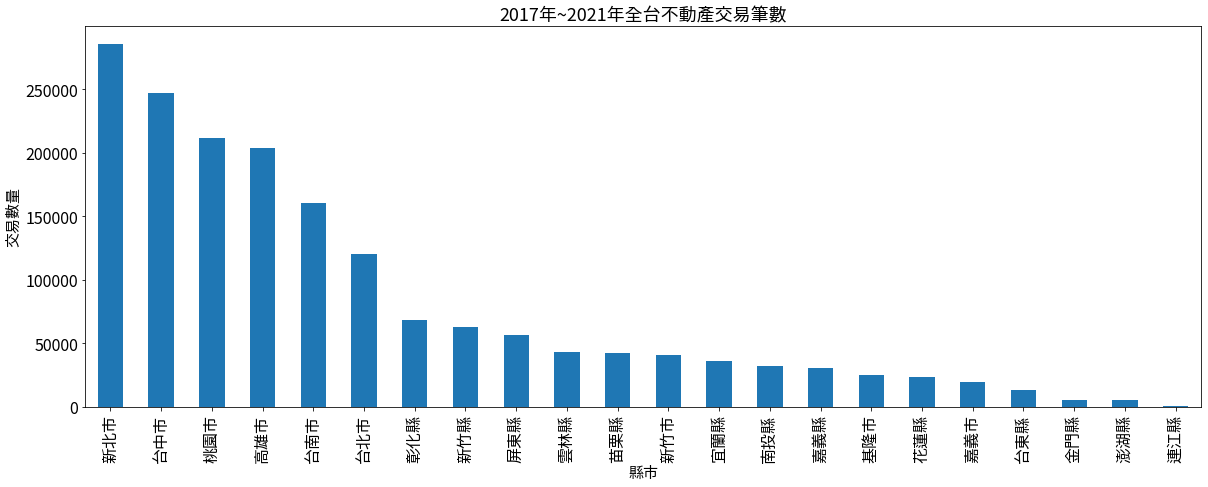

In [ ]:
#將各縣市"交易標的"的總數量繪製成長條圖，並降冪排序
real_estate_deals=df_total["交易標的"].groupby(df_total["縣市"]).count().sort_values(ascending=False)
plt.xlabel("縣市",fontsize=15)
plt.ylabel("交易數量",fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("2017年~2021年全台不動產交易筆數",fontsize=18)
real_estate_deals.plot(kind="bar",figsize=(20,7))
plt.show()

**A1.** 2017年~2021年台灣不動產交易筆數最多的三大縣市分別為：<font color = "blue">**新北市、台中市、桃園市**</font>

**Q2.** 近五年**最高交易總價**落在哪一鄉鎮市區？用途為何？

In [ ]:
#用max()函式找出"總價(NTD)"欄位最大值
max(df_total["總價(NTD)"])

28287000000.0

In [ ]:
#挑出最大值的列資料
max_value = df_total.loc[df_total["總價(NTD)"].values==28287000000.0]
max_value

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺/元),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
13389,2020,台北市,南港區,土地,2.828700e+10,商,1138794.0,0.0,0.0,0.0,0.0


**A2.** 近五年**最高交易總價**落在<font color = "blue">**2020年台北市南港區**</font>的一筆<font color = "blue">**土地**</font>交易，"都市土地使用分區"為<font color = "blue">**商用**</font>。

**Q3.** 2021年台灣房地產**平均單價**(每平方公尺/元)前三高的縣市為哪些？

In [ ]:
#建一個'交易標的'欄位排除'車位'及'土地'的資料表
_2021_df_besides_parking_land = df_2021.loc[(df_2021['交易標的'] != '車位') & (df_2021['交易標的'] != "土地")]
_2021_df_besides_parking_land

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺/元),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2021,台北市,文山區,房地(土地+建物),7300000,都市：其他:第三種住宅區。,178092.0,0,0.0,25.66,40.99
1,2021,台北市,文山區,房地(土地+建物),24500000,都市：其他:第二種住宅區。,139426.0,0,0.0,133.66,175.72
2,2021,台北市,文山區,建物,8500000,NaN,106824.0,0,0.0,79.57,79.57
3,2021,台北市,文山區,房地(土地+建物),11700000,都市：其他:第三種住宅區。,110159.0,0,0.0,89.45,106.21
4,2021,台北市,文山區,房地(土地+建物),9000000,都市：其他:第三種住宅區。,204499.0,0,0.0,25.66,44.01
...,...,...,...,...,...,...,...,...,...,...,...
1041,2021,澎湖縣,湖西鄉,房地(土地+建物),7300000,NaN,37971.0,0,0.0,183.67,192.25
1042,2021,澎湖縣,馬公市,房地(土地+建物),10000000,都市：其他:住宅區,30991.0,0,0.0,291.91,322.67
1047,2021,澎湖縣,馬公市,房地(土地+建物),10520000,都市：其他:住宅區,89868.0,0,0.0,117.06,117.06
29,2021,連江縣,北竿鄉,房地(土地+建物),2000000,NaN,41537.0,0,0.0,48.15,48.15


In [ ]:
#算出各縣市"單價(每平方公尺/元)"的平均，並採降冪排列
_2021_average_unit_price = _2021_df_besides_parking_land['單價(每平方公尺/元)'].groupby(_2021_df_besides_parking_land["縣市"]).mean() #算出平均
_2021_average_unit_price.round(1).sort_values(ascending=False) #ascending=False代表降冪排列

縣市
台北市    223394.8
新北市    108093.7
新竹市     76181.7
台中市     73593.2
新竹縣     68989.4
桃園市     67382.0
宜蘭縣     61854.2
高雄市     61082.7
金門縣     60912.2
台南市     57283.1
彰化縣     57192.7
南投縣     56085.9
嘉義市     54671.7
澎湖縣     53579.0
花蓮縣     50592.8
基隆市     49678.1
連江縣     48722.5
苗栗縣     47459.0
台東縣     46682.4
雲林縣     44134.7
屏東縣     42384.9
嘉義縣     40769.9
Name: 單價(每平方公尺/元), dtype: float64

**A3.** 2021台灣房地產**平均單價**(每平方公尺/元)前三高的縣市為：<font color = "blue">**台北市<font color="#E60000">(223394.8)</font>、新北市<font color="#E60000">(108093.7)</font>、新竹市<font color="#E60000">(76181.7)</font>**</font>   (單位：元)

**Q4.** 近五年各縣市**建物移轉總面積**加總前三名的縣市，又各自以哪三個鄉鎮市區為大宗?

In [ ]:
#算出各縣市"建物移轉總面積(平方公尺)"加總值
total_build_dimension_for_county = df_total["建物移轉總面積(平方公尺)"].groupby(df_total["縣市"]).sum()
total_build_dimension_for_county.sort_values(ascending=False)

縣市
新北市    35387928.39
台中市    32684530.43
桃園市    27852820.14
高雄市    26301566.75
台南市    17557940.40
台北市    14996826.30
新竹縣     8705462.44
彰化縣     6380099.87
新竹市     5638270.04
苗栗縣     4866707.31
屏東縣     4647553.66
宜蘭縣     4040209.33
雲林縣     3622862.48
基隆市     3029276.51
嘉義市     2373223.17
嘉義縣     2313274.09
南投縣     2242610.77
花蓮縣     2131425.74
台東縣      959205.97
金門縣      337972.03
澎湖縣      262648.19
連江縣        3062.41
Name: 建物移轉總面積(平方公尺), dtype: float64

由上得出，"建物移轉總面積(平方公尺)"加總值前三名為：<font color="blue">**新北市、台中市、桃園市**</font>

In [ ]:
#挑出新北市、台中市、桃園市的資料
_three_county = df_total.loc[df_total['縣市'].isin(['新北市','台中市','桃園市'])]  #isin函式可一次指定column的多個子項目
_three_county

,年份,縣市,鄉鎮市區,交易標的,總價(NTD),都市土地使用分區,單價(每平方公尺/元),車位總價(NTD),車位移轉總面積(平方公尺),主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2017,台中市,南區,房地(土地+建物)+車位,4850000.0,住,52398.0,0.0,0.00,58.33,92.56
1,2017,台中市,西區,房地(土地+建物),1500000.0,住,34562.0,0.0,0.00,24.57,43.40
2,2017,台中市,南區,房地(土地+建物)+車位,15680000.0,住,68688.0,0.0,45.82,100.93,228.28
3,2017,台中市,南區,車位,1000000.0,NaN,NaN,0.0,0.00,0.00,33.97
4,2017,台中市,南區,房地(土地+建物),13500000.0,住,56476.0,0.0,0.00,226.22,239.04
...,...,...,...,...,...,...,...,...,...,...,...
51508,2021,桃園市,新屋區,土地,11280000.0,NaN,3327.0,0.0,0.00,0.00,0.00
51509,2021,桃園市,八德區,土地,16600.0,都市：其他:道路用地,4663.0,0.0,0.00,0.00,0.00
51510,2021,桃園市,中壢區,房地(土地+建物),3970000.0,住,56248.0,0.0,0.00,70.58,70.58
51511,2021,桃園市,桃園區,土地,22300000.0,住,166418.0,0.0,0.00,0.00,0.00


In [ ]:
#算出三縣市分鄉鎮市區的"建物移轉總面積(平方公尺)"加總值
three_build_dimension = pd.DataFrame(_three_county.groupby(["縣市",'鄉鎮市區'])['建物移轉總面積(平方公尺)'].sum().sort_values(ascending=False))
three_build_dimension

建物移轉總面積(平方公尺)
縣市  鄉鎮市區               
桃園市 桃園區      5987409.03
    中壢區      5574539.91
台中市 北屯區      5026627.69
    西屯區      4835345.50
新北市 淡水區      4106112.97
...                 ...
桃園市 復興區         4668.67
新北市 坪林區         1004.99
    平溪區          438.17
    烏來區          423.43
台中市 和平區          315.18

[71 rows x 1 columns]

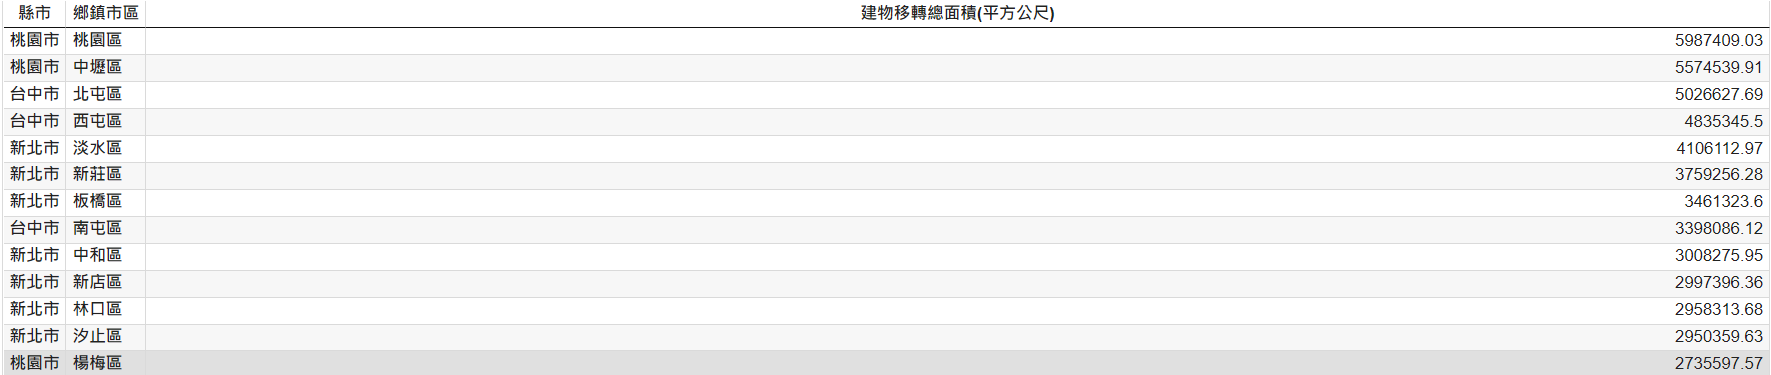

**A4.** 由上表可知2017年~2021年"**建物移轉總面積**(平方公尺)"加總值前三名縣市：<font color = "blue">**'新北市'、'台中市'、'桃園市'**</font>  鄉鎮市區排行如下：

<font color = "blue">**新北市：**</font>**1.**淡水區<font color="#E60000">**(4106112.97)**</font>  **2.**新莊區<font color="#E60000">**(3759256.28)**</font>  **3.**板橋區<font color="#E60000">**(3461323.6)**</font>

<font color = "blue">**台中市：**</font>**1.**北屯區<font color="#E60000">**(5026627.69)**</font>  **2.**西屯區<font color="#E60000">**(4835345.5)**</font>  **3.**南屯區<font color="#E60000">**(3398086.12)**</font>

<font color = "blue">**桃園市：**</font>**1.**桃園區<font color="#E60000">**(5987409.03)**</font>  **2.**中壢區<font color="#E60000">**(5574539.91)**</font>  **3.**楊梅區<font color="#E60000">**(2735597.57)**</font>      (單位：平方公尺)


**Q5.** 近五年各縣市**主建物佔比**(主建物面積/建物移轉總面積)眾數是多少?

In [ ]:
#建一個只有"年份"、"縣市"、"主建物面積(平方公尺)"、"建物移轉總面積(平方公尺)"的DataFrame
_df_build_ratio = pd.DataFrame()
_df_build_ratio["年份"] = df_total["年份"]
_df_build_ratio["縣市"] = df_total["縣市"]
_df_build_ratio["主建物面積(平方公尺)"] = df_total["主建物面積(平方公尺)"]
_df_build_ratio["建物移轉總面積(平方公尺)"] = df_total["建物移轉總面積(平方公尺)"]
_df_build_ratio

,年份,縣市,主建物面積(平方公尺),建物移轉總面積(平方公尺)
0,2017,台北市,0.00,40.77
1,2017,台北市,38.87,42.72
2,2017,台北市,59.00,72.47
3,2017,台北市,256.85,450.19
4,2017,台北市,0.00,0.00
...,...,...,...,...
60,2021,連江縣,0.00,0.00
61,2021,連江縣,0.00,0.00
62,2021,連江縣,0.00,0.00
63,2021,連江縣,0.00,0.00


In [ ]:
#跑for迴圈算出主建物占比，並放在list(列表)_build_ratio中
main_build_dimension = _df_build_ratio["主建物面積(平方公尺)"].values
total_build_dimension = _df_build_ratio["建物移轉總面積(平方公尺)"].values
_build_ratio = []
for k,v in zip(main_build_dimension,total_build_dimension):
  ratio = round(k/v,2)
  _build_ratio.append(ratio)

In [ ]:
#在_df_build_ratio中建立"主建物占比"欄位，並匯入資料
_df_build_ratio["主建物占比"] = _build_ratio
#將NaN值去除
_df_build_ratio.dropna(inplace = True)
_df_build_ratio

,年份,縣市,主建物面積(平方公尺),建物移轉總面積(平方公尺),主建物占比
0,2017,台北市,0.00,40.77,0.00
1,2017,台北市,38.87,42.72,0.91
2,2017,台北市,59.00,72.47,0.81
3,2017,台北市,256.85,450.19,0.57
6,2017,台北市,96.71,119.40,0.81
...,...,...,...,...,...
1041,2021,澎湖縣,183.67,192.25,0.96
1042,2021,澎湖縣,291.91,322.67,0.90
1047,2021,澎湖縣,117.06,117.06,1.00
29,2021,連江縣,48.15,48.15,1.00


In [ ]:
#用value_counts()算出各數值的總數量，最多的項目極為眾數
_df_build_ratio["主建物占比"].value_counts()

1.00     161160
0.48      39435
0.47      38898
0.49      38102
0.50      37310
          ...  
3.87          1
7.90          1
8.69          1
11.80         1
3.36          1
Name: 主建物占比, Length: 534, dtype: int64

**A5.** <font color = "blue">**眾數為1**</font>代表近五年交易標的以<font color = "blue">**建物為主**</font>，至於土地和建物一起移轉的主建物占比以<font color = "blue">**0.48**</font>為最多。

**Q6.** 近五年台灣六都**平均車位價值**(每平方公尺)排名？


In [ ]:
#建立六都sum"車位總價(NTD)"和"車位移轉總面積(平方公尺)"的資料表
total_sum = pd.DataFrame(df_total.loc[df_total["縣市"].isin(['台北市','新北市','桃園市','台中市','台南市','高雄市'])].groupby(['縣市'])[['車位總價(NTD)','車位移轉總面積(平方公尺)']].sum())
total_sum

,車位總價(NTD),車位移轉總面積(平方公尺)
縣市,,
台中市,8.289654e+10,2756450.41
台北市,7.929871e+10,1422266.80
台南市,1.929010e+10,644880.42
新北市,1.660352e+11,4417082.78
桃園市,9.588523e+10,2614006.65
高雄市,3.772788e+10,1244489.77


In [ ]:
#將六都'車位總價(NTD)'加總和'車位移轉總面積(平方公尺)'加總分別建立list
parking_space_price = list(total_sum['車位總價(NTD)'])
parking_space_dimension = list(total_sum['車位移轉總面積(平方公尺)'])
#依total_sum顯示順序挑出資料計算
print("六都平均車位價值(每平方公尺)")
print("------------------------------")
print("台北市:",round(parking_space_price[1]/parking_space_dimension[1],1))
print("新北市:",round(parking_space_price[3]/parking_space_dimension[3],1))
print("桃園市:",round(parking_space_price[4]/parking_space_dimension[4],1))
print("台中市:",round(parking_space_price[0]/parking_space_dimension[0],1))
print("台南市:",round(parking_space_price[2]/parking_space_dimension[2],1))
print("高雄市:",round(parking_space_price[5]/parking_space_dimension[5],1))

六都平均車位價值(每平方公尺)
------------------------------
台北市: 55755.2
新北市: 37589.3
桃園市: 36681.3
台中市: 30073.7
台南市: 29912.7
高雄市: 30315.9


**A6.** 2017~2021六都**平均車位價值**(每平方公尺)排名為：

<font color = "blue">**1.台北市  2.新北市  3.桃園市  4.高雄市  5.台中市  6.台南市**</font>

**Q7.** 2021年《遠見》雜誌公布全台「生活品質與現代化」排名前三大縣市:<font color = "blue">**新竹縣、桃園市、彰化縣**</font>，近五年不動產交易的**住用比率**為幾成?

In [ ]:
#挑出新竹縣、桃園市、彰化縣的"都市土地使用分區"資料
_Hsinchu_County = pd.DataFrame(df_total.loc[df_total["縣市"] == "新竹縣"]["都市土地使用分區"])
_Taoyuan_City = pd.DataFrame(df_total.loc[df_total["縣市"] == "桃園市"]["都市土地使用分區"])
_Changhua_County = pd.DataFrame(df_total.loc[df_total["縣市"] == "彰化縣"]["都市土地使用分區"])
_Hsinchu_County

,都市土地使用分區
0,住
1,商
2,住
3,NaN
4,NaN
...,...
15634,住
15635,NaN
15636,NaN
15637,NaN


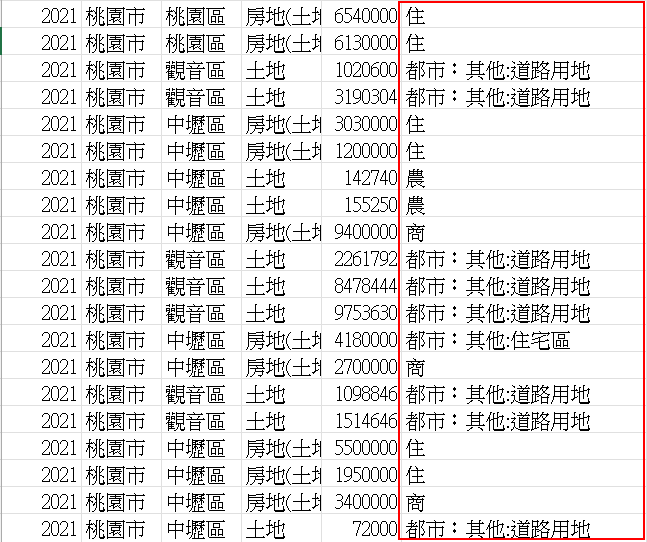

查看資料發現有眾多小項，是因為從2021年開始，"都市土地使用分區"的劃分除了"住"、"商"等，做了更細項的說明，由於同年裡"簡易"、"詳細"兩種寫法並存，因此這裡將小項統一彙整成"2021年詳細劃分"。

In [ ]:
#將NaN值去除
_Hsinchu_County.dropna(inplace = True)
_Taoyuan_City.dropna(inplace = True)
_Changhua_County.dropna(inplace = True)

In [ ]:
#將小項取代成"2021年詳細劃分"(由於三項一起會跑不動，因而分儲存格跑)
_Hsinchu_County.replace(_Hsinchu_County.loc[_Hsinchu_County["都市土地使用分區"].isin(['商','住','工','農','其他'])==False].values,"2021年詳細劃分",inplace=True)

In [ ]:
#將小項取代成"2021年詳細劃分"(由於三項一起會跑不動，因而分儲存格跑)
_Taoyuan_City.replace(_Taoyuan_City.loc[_Taoyuan_City["都市土地使用分區"].isin(['商','住','工','農','其他'])==False].values,"2021年詳細劃分",inplace=True)

In [ ]:
#將小項取代成"2021年詳細劃分"(由於三項一起會跑不動，因而分儲存格跑)
_Changhua_County.replace(_Changhua_County.loc[_Changhua_County["都市土地使用分區"].isin(['商','住','工','農','其他'])==False].values,"2021年詳細劃分",inplace=True)

In [ ]:
#計算子項目加總並放入新的變數裡
final_Hsinchu_County = _Hsinchu_County["都市土地使用分區"].value_counts()
final_Taoyuan_City = _Taoyuan_City["都市土地使用分區"].value_counts()
final_Changhua_County = _Changhua_County["都市土地使用分區"].value_counts()
final_Hsinchu_County

住            22404
商             8109
2021年詳細劃分     7797
其他            2331
工              811
農              570
Name: 都市土地使用分區, dtype: int64

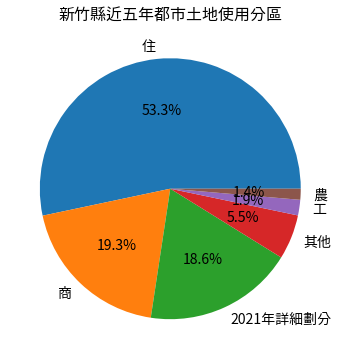

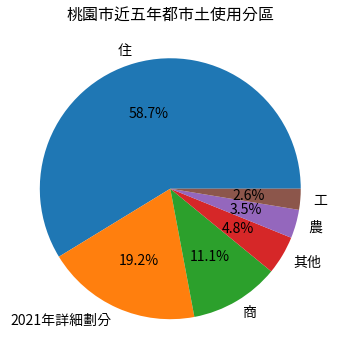

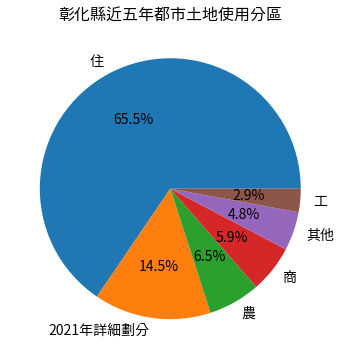

In [ ]:
#繪製新竹縣的圖
plt.figure(figsize=(20,6))
plt.pie(final_Hsinchu_County, labels=final_Hsinchu_County.index, autopct = "%1.1f%%", pctdistance = 0.6, textprops = {"fontsize" : 14})
plt.title("新竹縣近五年都市土地使用分區",fontsize = 16)
#繪製桃園市的圖
plt.figure(figsize=(20,6))
plt.pie(final_Taoyuan_City, labels=final_Taoyuan_City.index, autopct = "%1.1f%%", pctdistance = 0.6, textprops = {"fontsize" : 14})
plt.title("桃園市近五年都市土使用分區",fontsize = 16)
#繪製彰化縣的圖
plt.figure(figsize=(20,6))
plt.pie(final_Changhua_County, labels=final_Changhua_County.index, autopct = "%1.1f%%", pctdistance = 0.6, textprops = {"fontsize" : 14})
plt.title("彰化縣近五年都市土地使用分區",fontsize = 16)
plt.show()

**A7.** 由上面三張圖可知：<font color = "blue">**新竹縣、桃園市、彰化縣**</font> 都市土地使用分區的<font color = "blue">**"住"**</font>用分別占了<font color = "blue">**53.3%、58.7%、65.5%**</font> 以彰化縣比率為最高。

**Q8.** 觀察近五年**走勢**，Covid-19疫情影響年(2020年與2021年)各縣市不動產交易件數是否呈現量縮？

In [ ]:
#建立一個count'交易標的'，並以'年份','縣市'為索引的資料表
total_counts = pd.DataFrame(df_total.groupby(["年份","縣市"])["交易標的"].count()).sort_values(['縣市','年份'])
total_counts

,,交易標的
年份,縣市,
2017,南投縣,6054
2018,南投縣,6672
2019,南投縣,6164
2020,南投縣,6360
2021,南投縣,6843
...,...,...
2017,高雄市,36180
2018,高雄市,35215
2019,高雄市,39500


資料照著："南投縣","台中市","台北市","台南市","台東縣","嘉義市","嘉義縣","基隆市","宜蘭縣","屏東縣","彰化縣","新北市","新竹市","新竹縣","桃園市","澎湖縣","花蓮縣","苗栗縣","連江縣","金門縣","雲林縣","高雄市"的順序排列。

線條顏色：**<font color="red">紅色：北部</font><font color="#F5D625">、 中部：黃色</font><font color="blue">、 南部：藍色</font><font color="green">、 東部：綠色</font>**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

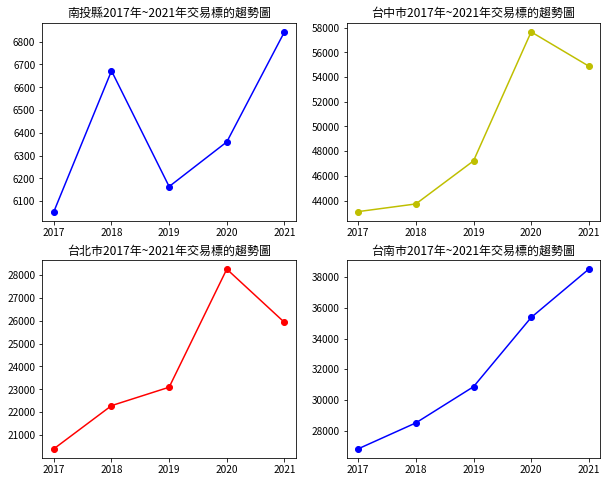

In [ ]:
#畫出各縣市折線圖(1)

#南投縣
years = ['2017','2018','2019','2020','2021']
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)            #以四個縣市為一組畫圖
_1total_deals = total_counts[:5]["交易標的"].values #利用索引值找資料
plt.plot(years,_1total_deals,"b-o")
plt.title("南投縣2017年~2021年交易標的趨勢圖")
#台中市
plt.subplot(2, 2, 2)                
_2total_deals = total_counts[5:10]["交易標的"].values
plt.plot(years,_2total_deals,"y-o")
plt.title("台中市2017年~2021年交易標的趨勢圖")
#台北市
plt.subplot(2, 2, 3)                
_3total_deals = total_counts[10:15]["交易標的"].values
plt.plot(years,_3total_deals,"r-o")
plt.title("台北市2017年~2021年交易標的趨勢圖")
#台南市
plt.subplot(2, 2, 4)                
_4total_deals = total_counts[15:20]["交易標的"].values
plt.plot(years,_4total_deals,"b-o")
plt.title("台南市2017年~2021年交易標的趨勢圖")
#下載成圖片
plt.savefig("county_plot1.png")
from google.colab import files
files.download("county_plot1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

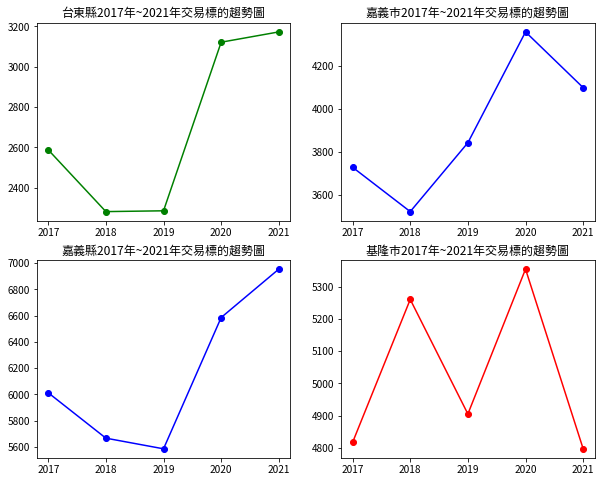

In [ ]:
#畫出各縣市折線圖(2)

#台東縣
years = ['2017','2018','2019','2020','2021']
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)                
_5total_deals = total_counts[20:25]["交易標的"].values
plt.plot(years,_5total_deals,"g-o")
plt.title("台東縣2017年~2021年交易標的趨勢圖")
#嘉義市
plt.subplot(2, 2, 2)                
_6total_deals = total_counts[25:30]["交易標的"].values
plt.plot(years,_6total_deals,"b-o")
plt.title("嘉義市2017年~2021年交易標的趨勢圖")
#嘉義縣
plt.subplot(2, 2, 3)                
_7total_deals = total_counts[30:35]["交易標的"].values
plt.plot(years,_7total_deals,"b-o")
plt.title("嘉義縣2017年~2021年交易標的趨勢圖")
#基隆市
plt.subplot(2, 2, 4)                
_8total_deals = total_counts[35:40]["交易標的"].values
plt.plot(years,_8total_deals,"r-o")
plt.title("基隆市2017年~2021年交易標的趨勢圖")
#下載成圖片
plt.savefig("county_plot2.png")
files.download("county_plot2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

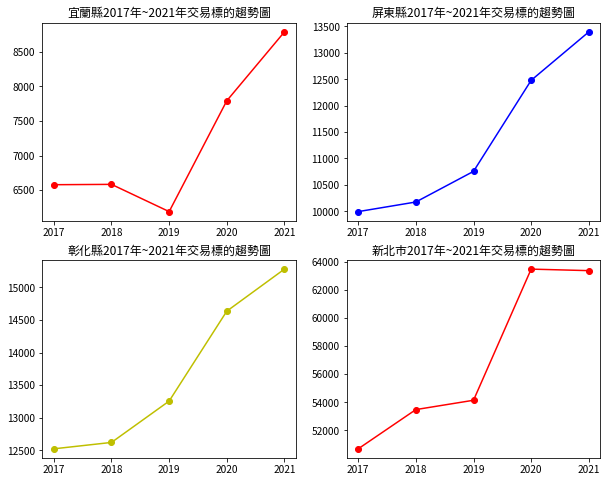

In [ ]:
#畫出各縣市折線圖(3)

#宜蘭縣
years = ['2017','2018','2019','2020','2021']
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)                
_9total_deals = total_counts[40:45]["交易標的"].values
plt.plot(years,_9total_deals,"r-o")
plt.title("宜蘭縣2017年~2021年交易標的趨勢圖")
#屏東縣
plt.subplot(2, 2, 2)                
_10total_deals = total_counts[45:50]["交易標的"].values
plt.plot(years,_10total_deals,"b-o")
plt.title("屏東縣2017年~2021年交易標的趨勢圖")
#彰化縣
plt.subplot(2, 2, 3)                
_11total_deals = total_counts[50:55]["交易標的"].values
plt.plot(years,_11total_deals,"y-o")
plt.title("彰化縣2017年~2021年交易標的趨勢圖")
#新北市
plt.subplot(2, 2, 4)                
_12total_deals = total_counts[55:60]["交易標的"].values
plt.plot(years,_12total_deals,"r-o")
plt.title("新北市2017年~2021年交易標的趨勢圖")
#下載成圖片
plt.savefig("county_plot3.png")
files.download("county_plot3.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

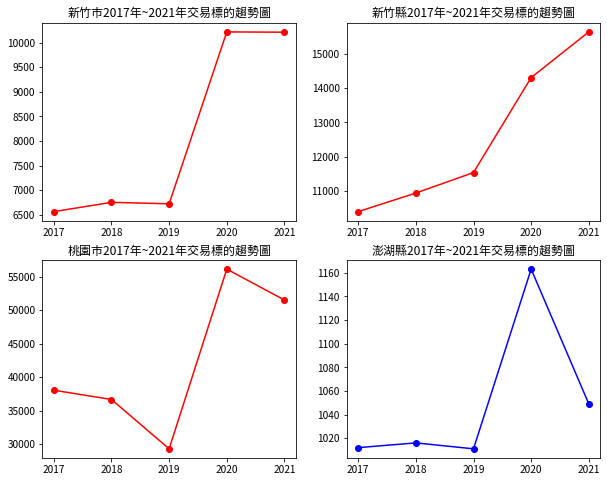

In [ ]:
#畫出各縣市折線圖(4)

#新竹市
years = ['2017','2018','2019','2020','2021']
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)                
_13total_deals = total_counts[60:65]["交易標的"].values
plt.plot(years,_13total_deals,"r-o")
plt.title("新竹市2017年~2021年交易標的趨勢圖")
#新竹縣
plt.subplot(2, 2, 2)                
_14total_deals = total_counts[65:70]["交易標的"].values
plt.plot(years,_14total_deals,"r-o")
plt.title("新竹縣2017年~2021年交易標的趨勢圖")
#桃園市
plt.subplot(2, 2, 3)                
_15total_deals = total_counts[70:75]["交易標的"].values
plt.plot(years,_15total_deals,"r-o")
plt.title("桃園市2017年~2021年交易標的趨勢圖")
#澎湖縣
plt.subplot(2, 2, 4)                
_16total_deals = total_counts[75:80]["交易標的"].values
plt.plot(years,_16total_deals,"b-o")
plt.title("澎湖縣2017年~2021年交易標的趨勢圖")
#下載成圖片
plt.savefig("county_plot4.png")
files.download("county_plot4.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

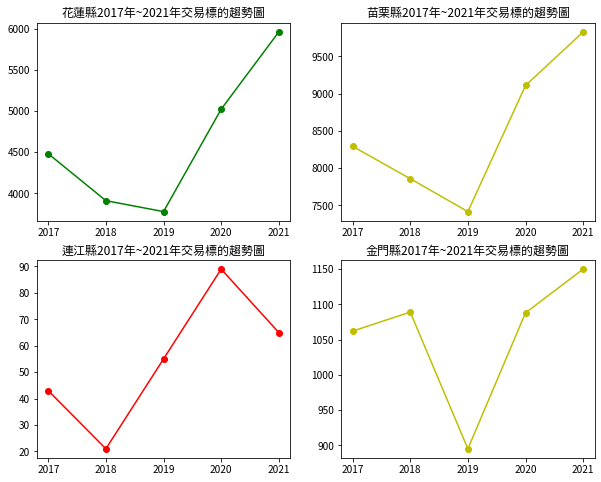

In [ ]:
#畫出各縣市折線圖(5)

#花蓮縣
years = ['2017','2018','2019','2020','2021']
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)                
_17total_deals = total_counts[80:85]["交易標的"].values
plt.plot(years,_17total_deals,"g-o")
plt.title("花蓮縣2017年~2021年交易標的趨勢圖")
#苗栗縣
plt.subplot(2, 2, 2)                
_18total_deals = total_counts[85:90]["交易標的"].values
plt.plot(years,_18total_deals,"y-o")
plt.title("苗栗縣2017年~2021年交易標的趨勢圖")
#連江縣
plt.subplot(2, 2, 3)                
_19total_deals = total_counts[90:95]["交易標的"].values
plt.plot(years,_19total_deals,"r-o")
plt.title("連江縣2017年~2021年交易標的趨勢圖")
#金門縣
plt.subplot(2, 2, 4)                
_20total_deals = total_counts[95:100]["交易標的"].values
plt.plot(years,_20total_deals,"y-o")
plt.title("金門縣2017年~2021年交易標的趨勢圖")
#下載成圖片
plt.savefig("county_plot5.png")
files.download("county_plot5.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

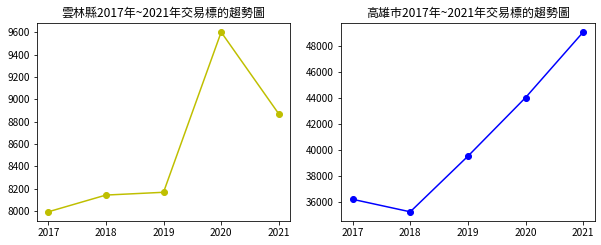

In [ ]:
#畫出各縣市折線圖(6)

#雲林縣
years = ['2017','2018','2019','2020','2021']
plt.figure(figsize=(10,8))  
plt.subplot(2, 2, 1)             
_21total_deals = total_counts[100:105]["交易標的"].values
plt.plot(years,_21total_deals,"y-o")
plt.title("雲林縣2017年~2021年交易標的趨勢圖")
#高雄市
plt.subplot(2, 2, 2)                
_22total_deals = total_counts[105:110]["交易標的"].values
plt.plot(years,_22total_deals,"b-o")
plt.title("高雄市2017年~2021年交易標的趨勢圖")
#下載成圖片
plt.savefig("county_plot6.png")
files.download("county_plot6.png")

**A8.** 實證結果顯示：Covid-19疫情影響年(2020年~2021年)交易筆數<font color="red">**未呈現量縮**</font>，反倒多達8個縣市於2019年明顯下降或迎來最低點。

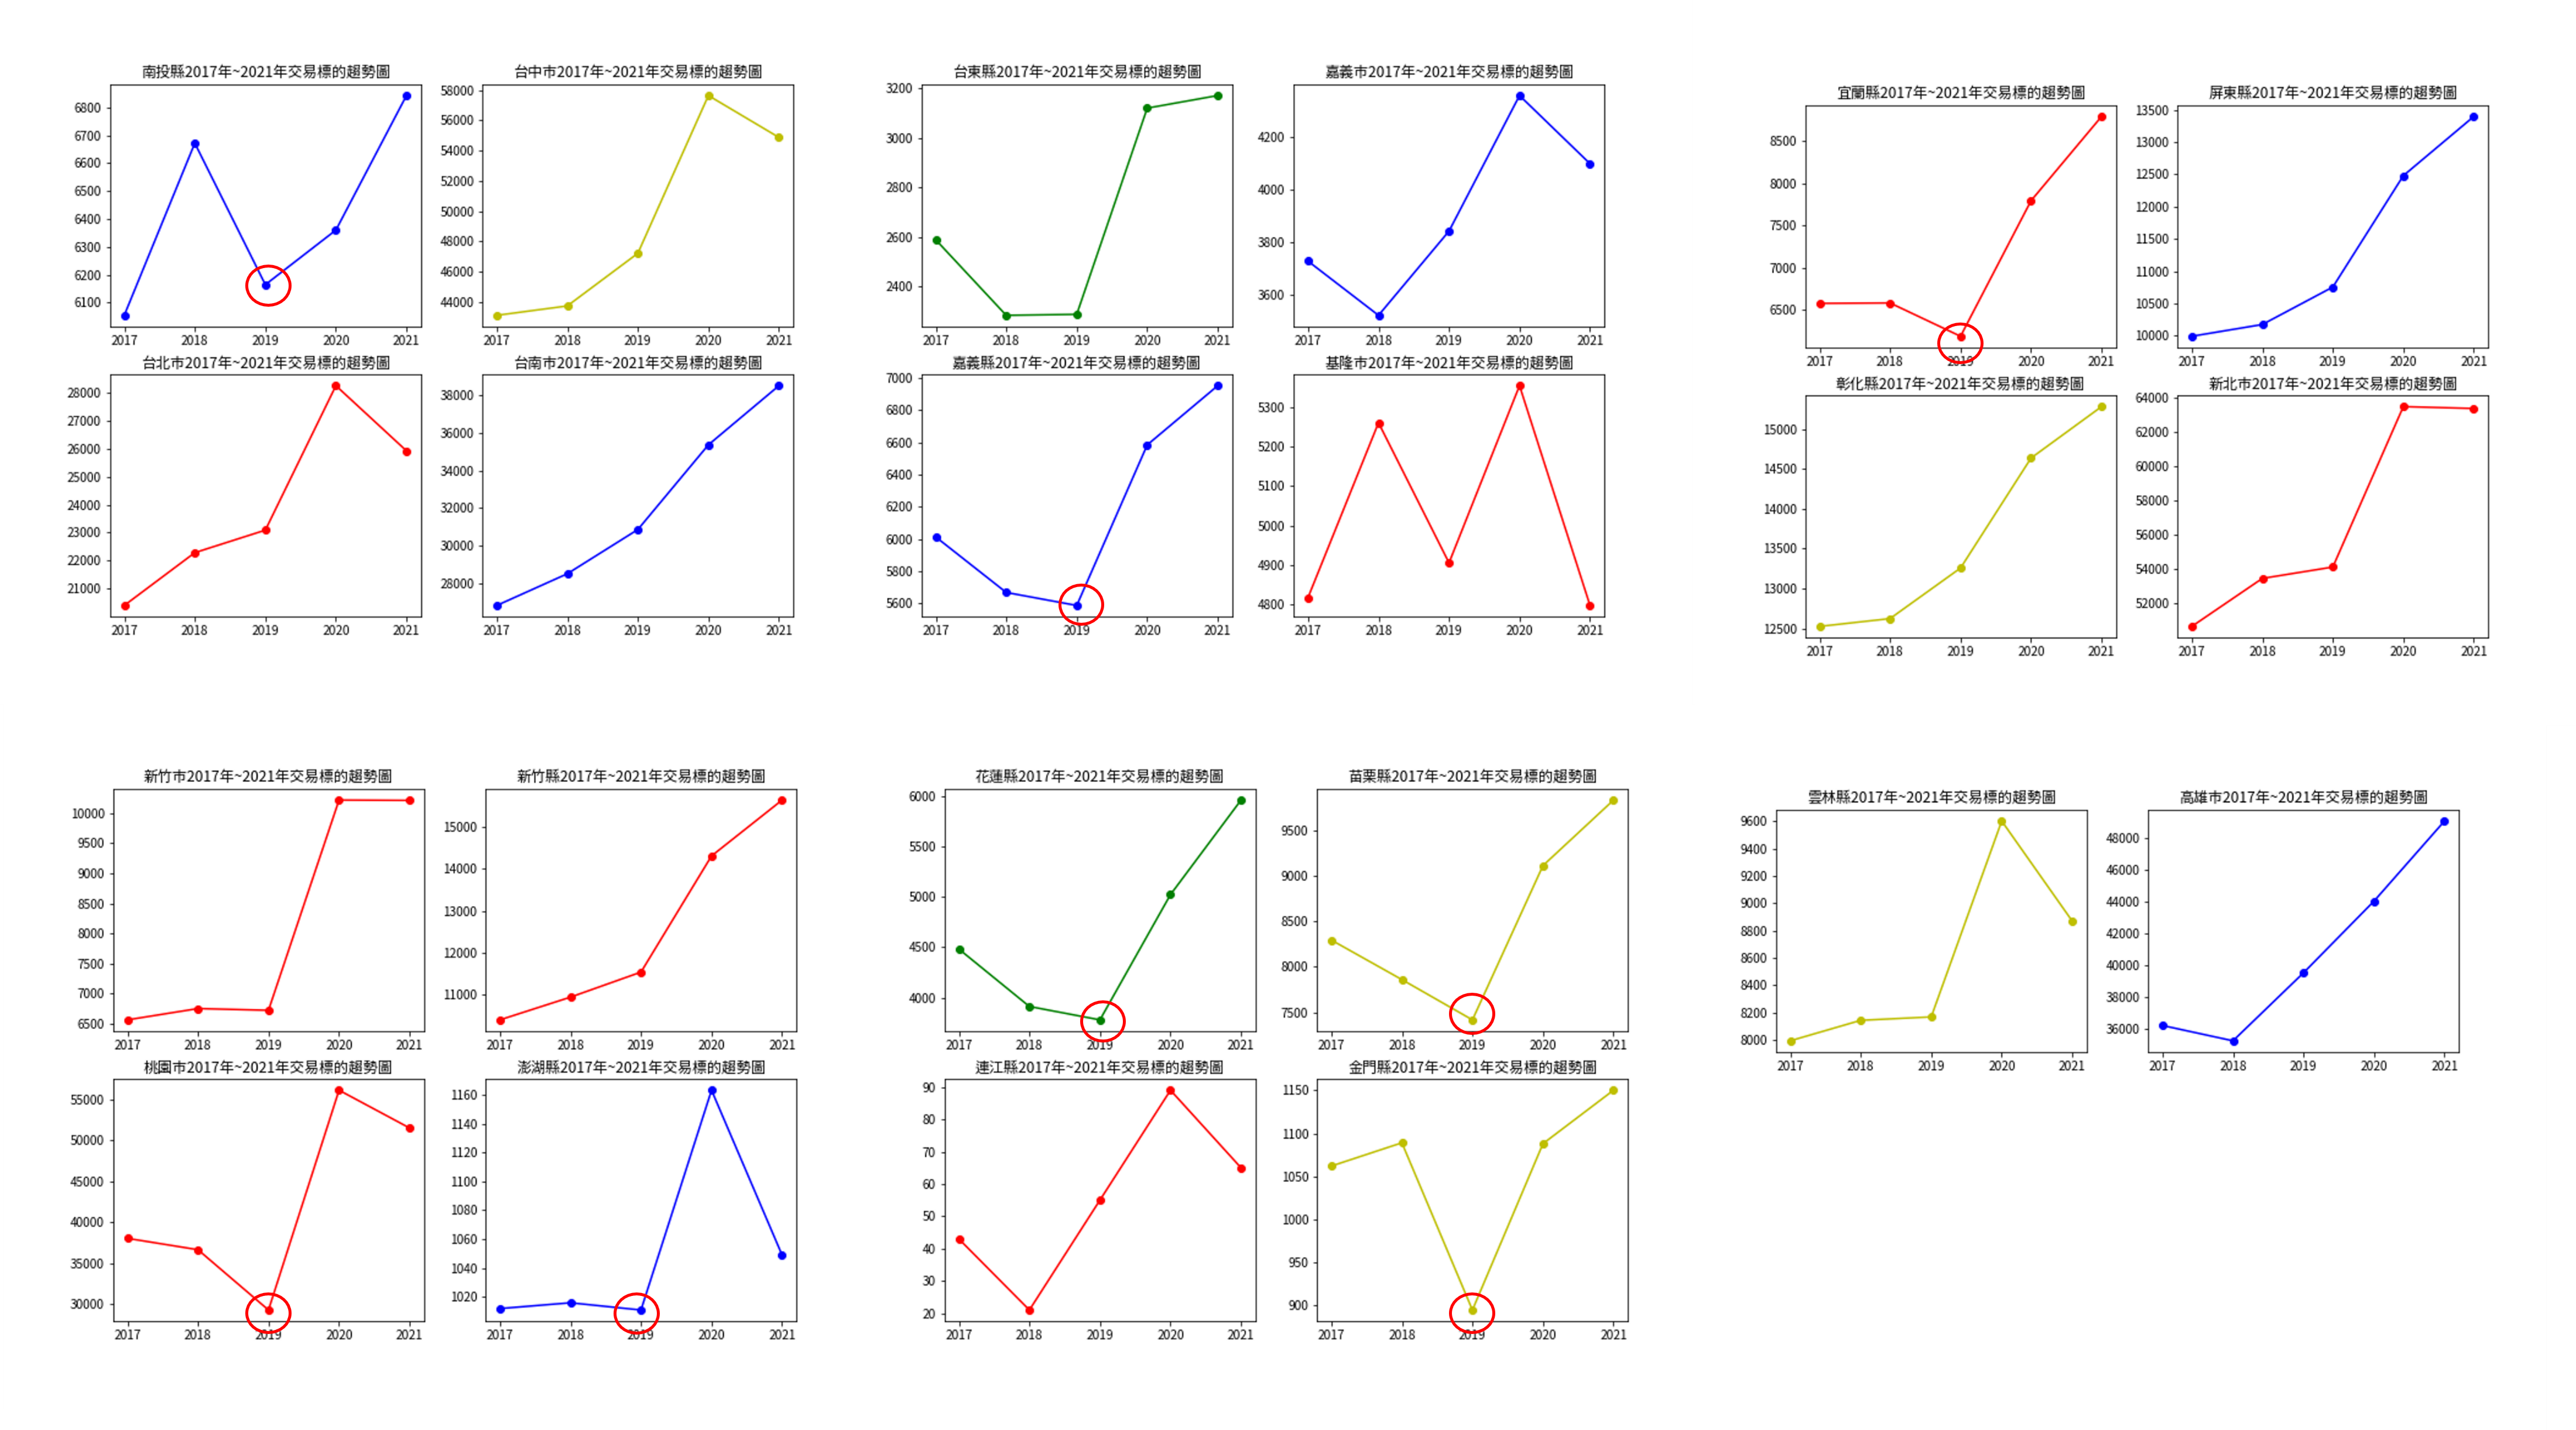

#**6.結論與建議**

##**6.1 疑問的回答**

**Q1.** 近五年台灣不動產**交易筆數**最多的是哪三個縣市？

**A1.** 2017年~2021年台灣不動產交易筆數最多的三大縣市分別為：<font color = "blue">**新北市、台中市、桃園市**</font>

**Q2.** 近五年**最高交易總價**落在哪一鄉鎮市區？用途為何？

**A2.** 近五年**最高交易總價**落在<font color = "blue">**2020年台北市南港區**</font>的一筆<font color = "blue">**土地**</font>交易，"都市土地使用分區"為<font color = "blue">**商用**</font>。

**Q3.** 2021年台灣房地產**平均單價**(每平方公尺/元)前三高的縣市為哪些？

**A3.** 2021台灣房地產**平均單價**(每平方公尺/元)前三高的縣市為：<font color = "blue">**台北市<font color="#E60000">(223394.8)</font>、新北市<font color="#E60000">(108093.7)</font>、新竹市<font color="#E60000">(76181.7)</font>**</font>   (單位：元)

**Q4.** 近五年各縣市**建物移轉總面積**加總前三名的縣市，又各自以哪三個鄉鎮市區為大宗?

**A4.** 由上表可知2017年~2021年"**建物移轉總面積**(平方公尺)"加總值前三名縣市：<font color = "blue">**'新北市'、'台中市'、'桃園市'**</font>  鄉鎮市區排行如下：

<font color = "blue">**新北市：**</font>**1.**淡水區<font color="#E60000">**(4106112.97)**</font>  **2.**新莊區<font color="#E60000">**(3759256.28)**</font>  **3.**板橋區<font color="#E60000">**(3461323.6)**</font>

<font color = "blue">**台中市：**</font>**1.**北屯區<font color="#E60000">**(5026627.69)**</font>  **2.**西屯區<font color="#E60000">**(4835345.5)**</font>  **3.**南屯區<font color="#E60000">**(3398086.12)**</font>

<font color = "blue">**桃園市：**</font>**1.**桃園區<font color="#E60000">**(5987409.03)**</font>  **2.**中壢區<font color="#E60000">**(5574539.91)**</font>  **3.**楊梅區<font color="#E60000">**(2735597.57)**</font>      (單位：平方公尺)

**Q5.** 近五年各縣市**主建物佔比**(主建物面積/建物移轉總面積)眾數是多少?

**A5.** <font color = "blue">**眾數為1**</font>代表近五年交易標的以<font color = "blue">**建物為主**</font>，至於土地和建物一起移轉的主建物占比以<font color = "blue">**0.48**</font>為最多。

**※**由此可知，近五年房地產交易<font color = "blue">**建物只佔了土地的一半**</font>，以大眾心理來看，性價比屬於偏低的。

**※**大於1的數未查到合理解釋。

**Q6.** 近五年台灣六都**平均車位價值**(每平方公尺)排名？

**A6.** 2017~2021六都**平均車位價值**(每平方公尺)排名為：

<font color = "blue">**1.台北市  2.新北市  3.桃園市  4.高雄市  5.台中市  6.台南市**</font>

**※**以標準車位(2.5公尺×6公尺)來算，在台北至少需要55755.2×2.5×6 = 836328元才買得起一個車位。

**Q7.** 2021年《遠見》雜誌公布全台「生活品質與現代化」排名前三大縣市:<font color = "blue">**新竹縣、桃園市、彰化縣**</font>，近五年不動產交易的**住用比率**為幾成?

**A7.** 由上面三張圖可知：<font color = "blue">**新竹縣、桃園市、彰化縣**</font> 都市土地使用分區的<font color = "blue">**"住"**</font>用分別占了<font color = "blue">**53.3%、58.7%、65.5%**</font> 以彰化縣比率為最高。

**Q8.** 觀察近五年**走勢**，Covid-19疫情影響年(2020年與2021年)各縣市不動產交易件數是否呈現量縮？

**A8.** 實證結果顯示：Covid-19疫情影響年(2020年與2021年)交易筆數<font color="red">**未呈現量縮**</font>，反倒多達8個縣市於2019年明顯下降。

##**6.2 結論**

本研究對2017年~2021年「內政部不動產交易實價查詢服務網」不動產交易資料進行資料分析，探討價值、交易量、用途、趨勢等，研究結論如下：

**1.**對**交易筆數、平均單價、建物移轉總面積**的分析：前三名幾乎被六都中的四都：**<font color="blue">新北市、台中市、台北市、桃園市</font>**佔據，唯有**平均單價**第三名為**<font color="blue">新竹市</font>**。


**2.**對**最高交易總價**的分析：無懸念落在首都**<font color="blue">台北市</font>**。

**3.**對**主建物佔比**的分析：只移轉建物的交易佔多數，房地產交易中主建物佔比大多僅僅5成左右。

**4.**對**六都平均車位價值**的分析：前三名為北部直轄市，最後一名則是台南市。

**5.**對**<font color="blue">新竹縣、桃園市、彰化縣**</font>**住用比率**的分析：三個縣市的不動產住用比率為5、6成，倘若2021年細項可被簡易分類，比率極有可能提升。

**6.**對近五年不動產交易筆數**走勢**的分析：不動產交易未受Covid-19疫情影響，反倒多縣市於2019年明顯下降或迎來低點。

##**6.3 建議**

根據**交易筆數、平均單價、建物移轉總面積**的分析結果顯示**<font color="blue">新北市</font>**為近五年台灣置產最熱門縣市，且建物移轉總面積可觀，值得一提的是：目前平均單價為首都台北市的一半，倘若近期民眾想買大坪數房子，新北市是不錯的選擇。

買房前除了考量坪數外，不妨算算**主建物占比**，去得知能自行運用的空間大小，當然並不是說主建物占比只有0.5的房子一定不划算，依照自身需求去審度才是最重要的。

##**6.4 研究檢討**


**1.**本研究的8個疑問前後沒有承接，使分析缺乏主軸，建議下次提出疑問前再多加規劃。

**2.**本次研究採數據排名為主，建議下次可以增加資料視覺化的比重，會使研究結果更加直觀。

**3.**Q8的"各縣市交易筆數折線圖"Y軸級距不一，可能造成判讀偏誤，倘若統一尺標可以消除此疑慮。



## 撰寫注意事項/評分重點：

1. 使用本課程教授重點，以Python撰寫，且所有程式碼必須註解其目的與功能。
2. 每一個主要輸出結果(統計、表或圖)的下方，必須要有文字格的對於結果的詮釋。
3. 以 .ipynb 、 .html 兩種格式(二個不同格式檔案、相同內容)繳交最後報告；.html 格式檔案內容必須全部成功執行、且看得到執行結果。
4. 避免冗長、無意義的執行輸出結果。
5. 專題成果必須是逐步累積的，可以看得到每一星期的新增成果與改變。
6. 使用本template與章節。

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/課後補強_專題一_S08521136_20221202.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/課後補強_專題一_S08521136_20221202.ipynb to html
[NbConvertApp] Writing 3088393 bytes to /content/drive/MyDrive/Colab Notebooks/課後補強_專題一_S08521136_20221202.html
